In [205]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [206]:
df = pd.read_csv('files/BBC News Train.csv')

In [207]:
df.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

In [208]:
df['Text'][89]

'campbell to be lions consultant former government communications chief alastair campbell will act as a media consultant to sir clive woodward s 2005 lions on their tour to new zealand.  campbell  who left downing street earlier this year  will advise on media strategy before and during the tour.  i hope i can contribute to the planning and preparation  and to ensuring the media and public get the most out of the tour itself   he said.  i am also looking forward to going out for the later stages of the tour.  woodward s decision to call in prime minister tony blair s former spin doctor springs from the deterioration in media relations on the last lions tour of australia in 2001  when new zealander graham henry was the head coach. the furore surrounding the newspaper diaries of matt dawson and austin healey was compounded by other disillusioned players venting their frustration through the media.  the lions is a massive media event   said woodward  who will be the head coach.  there wil

In [209]:
#independent variables
x = df.drop('Category', axis=1)

In [210]:
x

ArticleId                                               Text
0          1833  worldcom ex-boss launches defence lawyers defe...
1           154  german business confidence slides german busin...
2          1101  bbc poll indicates economic gloom citizens in ...
3          1976  lifestyle  governs mobile choice  faster  bett...
4           917  enron bosses in $168m payout eighteen former e...
...         ...                                                ...
1485        857  double eviction from big brother model caprice...
1486        325  dj double act revamp chart show dj duo jk and ...
1487       1590  weak dollar hits reuters revenues at media gro...
1488       1587  apple ipod family expands market apple has exp...
1489        538  santy worm makes unwelcome visit thousands of ...

[1490 rows x 2 columns]

In [211]:
y = df['Category']

In [212]:
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [213]:
import seaborn as sns

C:\Users\Akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

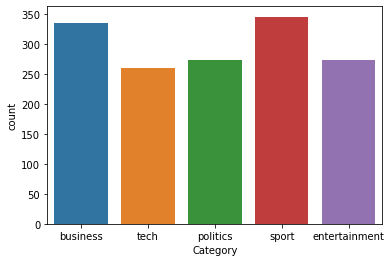

In [214]:
sns.countplot(y)

In [215]:
from nltk.corpus import stopwords
import nltk
import re
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [216]:
voc_size = 10000

In [217]:
x['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [218]:
#data preprocessing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(x['Text'])):
    review = re.sub('[^a-zA-Z]', ' ', x['Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [219]:
corpus[0]

'worldcom ex bos launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom ex head internal accounting alerted director irregular accounting practice u telecom giant warning led collapse firm following discovery bn bn accounting fraud mr ebbers pleaded guilty charge fraud conspiracy prosecution lawyer argued mr ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate m cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early said andersen given green light procedure practice used worldcom mr ebber lawyer said unaware fraud arguing auditor alert problem m cooper also said shareholder meeting mr ebbers often passed technical question company finance chief giving brief answer prosecution star witness former worldcom financial chief scott sullivan

In [220]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
maxc= 0
for ls in onehot_repr:
        maxc += len(ls)
maxc/len(onehot_repr)

216.07248322147652

In [221]:
onehot_repr[0]

[6606,
 8028,
 7882,
 3108,
 5714,
 1822,
 8895,
 6978,
 6606,
 6847,
 1140,
 172,
 6491,
 6075,
 7036,
 4232,
 660,
 2268,
 7403,
 3366,
 5397,
 7378,
 6606,
 8028,
 7235,
 5619,
 4702,
 5562,
 9266,
 1666,
 4702,
 2532,
 6953,
 5074,
 751,
 9943,
 8635,
 2691,
 1695,
 296,
 9634,
 6730,
 6730,
 4702,
 6075,
 3329,
 172,
 5323,
 4145,
 7036,
 6075,
 8803,
 914,
 1822,
 5747,
 3329,
 172,
 951,
 1577,
 4702,
 1574,
 6606,
 7001,
 3779,
 3894,
 7715,
 3214,
 9203,
 7014,
 9578,
 9191,
 7230,
 3258,
 3167,
 7378,
 6866,
 6084,
 5283,
 9508,
 9759,
 2644,
 6853,
 5605,
 2939,
 8550,
 8805,
 7174,
 7241,
 6606,
 4702,
 6381,
 9955,
 7174,
 8060,
 3000,
 975,
 8295,
 2532,
 9098,
 6606,
 3329,
 752,
 1822,
 9955,
 3238,
 6075,
 9987,
 8550,
 7811,
 2729,
 3167,
 7378,
 8302,
 9955,
 9502,
 8170,
 3329,
 172,
 1086,
 840,
 3268,
 7081,
 660,
 4686,
 6847,
 9073,
 9484,
 9397,
 914,
 8386,
 3366,
 6978,
 6606,
 6632,
 6847,
 5303,
 504,
 9955,
 3329,
 172,
 5019,
 4702,
 45,
 1695,
 9660,
 73

In [222]:
sent_length=225
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1745  604 6730]
 [   0    0    0 ...  655 7139 6394]
 [6587  295 4309 ... 4899 6904 6475]
 ...
 [   0    0    0 ... 2943 1082 8113]
 [8226 4441 6352 ... 4916 9414 2366]
 [   0    0    0 ... 9859 5705  259]]


In [228]:
embedded_docs[1489]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 7049, 2577, 2077, 3609, 3951, 1434, 5785, 2353,
        680, 6083,  772, 9098, 8744, 9294, 1490, 9878, 7049, 2577, 7403,
       2936, 5249, 1463, 7207, 3427, 7383, 5785, 8364, 2330, 9199,   56,
       4946, 9098, 6599, 9829, 7049, 9294, 1834, 8744, 4691, 7379, 9050,
       9556,  460, 2644,  575, 2577, 5900, 4427, 7993, 5990, 1943, 9556,
       6083, 8364, 2330, 8977, 9050, 9556, 7383, 2577, 6481,  989,  460,
       5785, 5012,  557, 6599, 9829, 8744, 6481, 7379, 6255, 1363,  655,
       5280, 4593, 4650, 7239, 2332, 2539, 2730, 1695, 1609, 1677, 8744,
       2730, 6199, 9955, 2012, 7207, 6745, 5751, 32

In [229]:
Y = pd.get_dummies(y).values

In [230]:
Y[678]

array([0, 0, 0, 0, 1], dtype=uint8)

In [72]:
## Creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(5,activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 225, 100)          1000000   
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 5)                 505       
                                                                 
Total params: 1,080,905
Trainable params: 1,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
len(embedded_docs)

1490

In [70]:
# Train tesst split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(embedded_docs,Y,test_size=0.20, random_state=42)

In [90]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
19/19 [==============================] - 5s 239ms/step - loss: 0.0126 - accuracy: 0.9983 - val_loss: 0.1923 - val_accuracy: 0.9497
Epoch 2/10
19/19 [==============================] - 5s 270ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.2599 - val_accuracy: 0.9362
Epoch 3/10
19/19 [==============================] - 6s 291ms/step - loss: 0.0979 - accuracy: 0.9656 - val_loss: 0.6053 - val_accuracy: 0.8087
Epoch 4/10
19/19 [==============================] - 6s 294ms/step - loss: 0.0971 - accuracy: 0.9899 - val_loss: 0.2748 - val_accuracy: 0.9094
Epoch 5/10
19/19 [==============================] - 6s 318ms/step - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.2464 - val_accuracy: 0.9295
Epoch 6/10
19/19 [==============================] - 6s 308ms/step - loss: 0.0102 - accuracy: 0.9992 - val_loss: 0.2542 - val_accuracy: 0.9228
Epoch 7/10
19/19 [==============================] - 7s 348ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.2076 - val_accuracy: 0.9430
Epoch 

In [91]:
accuracy = model.evaluate(x_test,y_test)
accuracy

10/10 [==============================] - 0s 29ms/step - loss: 0.1681 - accuracy: 0.9564


[0.16813288629055023, 0.9563758373260498]

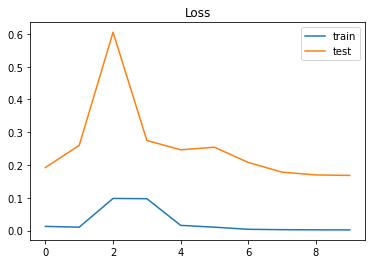

In [93]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [83]:
y_pred[0], y_test[0]


(array([0.00290885, 0.00675499, 0.00278315, 0.03818285, 0.94937015],
       dtype=float32),
 array([0, 1, 0, 0, 0], dtype=uint8))

In [86]:
np.argmax(y_pred[0]), y_test[0]

(4, array([0, 1, 0, 0, 0], dtype=uint8))

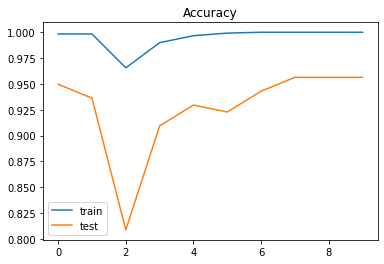

In [96]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [186]:
y_test[0]

array([0, 1, 0, 0, 0], dtype=uint8)

In [187]:
x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       4334, 7919, 3926, 6798, 1038, 7314, 8677, 5750, 4795, 9071, 6953,
       4021,  751, 4334, 7919, 8249, 9507, 5399, 8529,  749, 7049, 6176,
       4543, 6331, 4012, 5011, 2794, 4334, 7919, 5255, 2866, 8676, 9943,
       9037, 5419, 3013, 1081, 2794, 4334, 7919, 8005, 4947, 6176, 4093,
       1046, 7055, 5785, 4334, 7919, 9955, 8253, 9862, 4057, 1943, 8249,
       4334, 7919, 9181, 8160, 8249, 4368, 6137,  514, 9037, 3329, 1081,
       9955, 2212, 7154, 8791, 8249, 5358, 9581, 90

In [188]:
pred = model.predict(x_train[:10])

1/1 [==============================] - 0s 32ms/step


In [189]:
pred

array([[1.11057001e-04, 1.07633154e-04, 1.36961040e-04, 9.99146700e-01,
        4.97681671e-04],
       [9.98786986e-01, 5.51606994e-04, 1.80205287e-04, 3.51678289e-04,
        1.29369044e-04],
       [9.83616570e-04, 6.49288821e-04, 9.97502625e-01, 5.91027783e-04,
        2.73347890e-04],
       [1.73343171e-04, 1.87661688e-04, 1.98995142e-04, 9.98324811e-01,
        1.11511839e-03],
       [1.10474299e-03, 6.93046430e-04, 9.97187793e-01, 6.66535052e-04,
        3.47985333e-04],
       [9.99177277e-01, 3.40093335e-04, 1.20582059e-04, 2.69317476e-04,
        9.28403824e-05],
       [9.99064028e-01, 4.20807977e-04, 1.14777795e-04, 3.08521179e-04,
        9.17925572e-05],
       [3.32458381e-04, 9.98600185e-01, 5.30430407e-05, 6.13816665e-05,
        9.52918082e-04],
       [9.99096155e-01, 3.89681139e-04, 1.15191615e-04, 2.91207951e-04,
        1.07758970e-04],
       [2.74556951e-04, 9.98886645e-01, 3.18193051e-05, 4.53901848e-05,
        7.61605799e-04]], dtype=float32)

In [267]:
cls = ['Bussiness', 'Entertainment','Politics','Sports','Tech']

In [271]:
import numpy as np
for i in range(10):
    print('predicted :',cls[np.argmax(pred[i])])
    print('actual', cls[np.argmax(y_train[i])])
    print("--------------------------------")
    

predicted : Sports
actual Sports
--------------------------------
predicted : Bussiness
actual Bussiness
--------------------------------
predicted : Politics
actual Politics
--------------------------------
predicted : Sports
actual Sports
--------------------------------
predicted : Politics
actual Politics
--------------------------------
predicted : Bussiness
actual Bussiness
--------------------------------
predicted : Bussiness
actual Bussiness
--------------------------------
predicted : Entertainment
actual Entertainment
--------------------------------
predicted : Bussiness
actual Bussiness
--------------------------------
predicted : Entertainment
actual Entertainment
--------------------------------


In [282]:
sent = ['pompeii gets digital make-over the old-fashioned audio tour of historical places could soon be replaced with computer-generated images that bring the site to life.  a european union-funded project is looking at providing tourists with computer-augmented versions of archaeological attractions. it would allow visitors a glimpse of life as it was originally lived in places such as pompeii. it could pave the way for a new form of cultural tourism.  the technology would allow digital people and other computer-generated elements to be combined with the actual view seen by tourists as they walk around an historical site.  the lifeplus project is part of the eu s information society technologies initiative aimed at promoting user-friendly technology and enhancing european cultural heritage. engineers and researchers working in the europe-wide consortium have come up with a prototype augmented-reality system. it would require the visitor to wear a head-mounted display with a miniature camera and a backpack computer. the camera captures the view and feeds it to software on the computer where the visitor s viewpoint is combined with animated virtual elements. at pompeii for example  the visitor would not just see the frescos  taverns and villas that have been excavated  but also people going about their daily life. augmented reality has been used to create special effects in films such as troy and lord of the rings and in computer gaming.   this technology can now be used for much more than just computer games   said professor nadia magnenat-thalman of the swiss research group miralab.   we are  for the first time  able to run this combination of software processes to create walking  talking people with believable clothing  skin and hair in real-time   she said. unlike virtual reality  which delivers an entirely computer-generated scene to the viewer  the lifeplus project is about combining digital and real views. crucial to the technique is the software that interprets the visitor s view and provides an accurate match between the real and virtual elements. the software capable of doing this has been developed by a uk company  2d3. andrew stoddart  chief scientist at 2d3  said that the eu project has been driven by a new desire to bring the past to life.  the popularity of television documentaries and dramatisations using computer-generated imagery to recreate scenes from ancient history demonstrates the widespread appeal of bringing ancient cultures to life   he said.']

In [283]:
sent_clean = re.sub('[^a-zA-Z]', ' ', sent[0])
sent_clean = sent_clean.lower()
sent_clean = sent_clean.split()
    
sent_clean = [lemmatizer.lemmatize(word) for word in sent_clean if not word in stopwords.words('english')]
sent_clean = ' '.join(sent_clean)
sent_clean1 = []
sent_clean1.append(sent_clean)

In [284]:
sent_clean1

['pompeii get digital make old fashioned audio tour historical place could soon replaced computer generated image bring site life european union funded project looking providing tourist computer augmented version archaeological attraction would allow visitor glimpse life originally lived place pompeii could pave way new form cultural tourism technology would allow digital people computer generated element combined actual view seen tourist walk around historical site lifeplus project part eu information society technology initiative aimed promoting user friendly technology enhancing european cultural heritage engineer researcher working europe wide consortium come prototype augmented reality system would require visitor wear head mounted display miniature camera backpack computer camera capture view feed software computer visitor viewpoint combined animated virtual element pompeii example visitor would see fresco tavern villa excavated also people going daily life augmented reality used

In [285]:
onehot_repr_sent=[one_hot(words,voc_size)for words in sent_clean1]

In [286]:
len(onehot_repr_sent)

1

In [287]:
embedded_docs_sent=pad_sequences(onehot_repr_sent,padding='pre',maxlen=sent_length)
print(embedded_docs_sent)

[[8411  117 6245 9819 9556  540 5094 1910 8084 8120 5134 5528 7147 8411
  4981 8274  662 7388 5085 8794 5478  198  540 3433 2241 7193  925 2724
  2296 3575 2644 7247 6169 4021 6932 5085 8794 4401 1597 8411  117  189
  9902 7193  769 6504 7147 7349  992 8774 9556    6 8120 9669 3994 8386
  3893 6932 4718 6278 9198 7477 1553 6932 9854 5094 6169 8436 1431 6603
  7848 2006 3923  455 5472 3566 4981 1280 1849 5085 2300 5478 6423 7235
  7065 5928 2503 8669 8486 8411 8669 8989  769 4535 9829 8411 5478 3246
  9902 5134 1891  189  925 4760 5478 5085 3508 8805 7119 3543 1868 8302
  1597 9174 3484  540 4981 1280 9098 2012 2438 7013 4609  428 4481 1419
  8411 5923 6932 9098  983 8411 4376 9955 9465 1617 8932  773 8019 5350
  5399 2362 7403 1509 5522 6866 1226 9829 3344 2012 9596 7133 1597 4598
  2284 2774  330 2109 1509 9955 3830 1891 1280 4919 4864 8411  117 8762
  3139    6 8120 5029 4401 2109  769 5703 8740 9829 8402 5478  769 4483
   295  813 2109 1891  189 9829 6693 3773 5256  660 2839 4525 68

In [288]:
embedded_docs_sent.shape

(1, 225)

In [289]:
p = model.predict(embedded_docs_sent)

1/1 [==============================] - 0s 61ms/step


In [290]:
print('predicted :',cls[np.argmax(p)])

predicted : Tech
